In [60]:
import numpy as np
import os
import matplotlib.pyplot as plt
import scipy

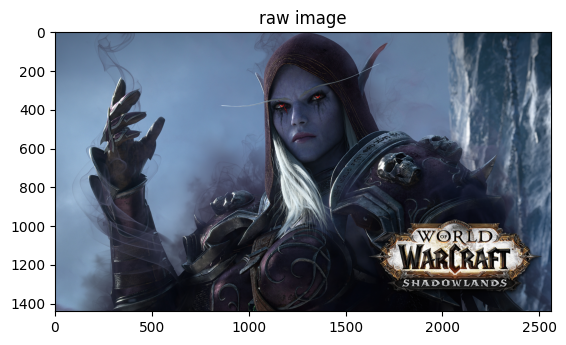

image shape (1440, 2560, 3)


In [14]:
path = "./image1.jpeg"
if os.path.exists(path):
    image = plt.imread(path)
    plt.imshow(image)
    plt.title("raw image")
    plt.show()
    print(f"image shape {image.shape}")
else:
    print("Path image not found")
    image = None

In [79]:
#convert to gray image
if image.ndim == 3:
    image = image.mean(axis=2)
if image.max() > 1:
    image = image.astype("float") / 256

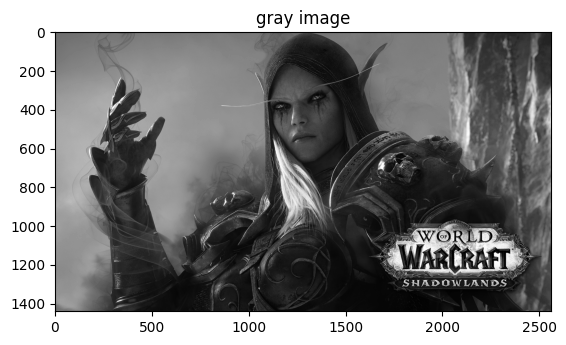

image shape (1440, 2560)


In [81]:
plt.imshow(image,cmap="gray")
plt.title("gray image")
plt.show()
print(f"image shape {image.shape}")

In [57]:
sample_array = np.random.randint(9,size = (5,5))
sample_array

array([[4, 1, 5, 5, 2],
       [1, 2, 2, 2, 3],
       [8, 4, 4, 7, 8],
       [7, 8, 3, 1, 4],
       [1, 2, 3, 1, 1]])

In [66]:
linear_kernel = np.array([
    [0,0,0],
    [0,1,0],
    [0,0,0]
])
blur_kernel = 1/9 * np.array([
    [1,1,1],
    [1,1,1],
    [1,1,1]
])
linear_kernel = np.array([
    [0,0,0],
    [0,1,0],
    [0,0,0]
])
linear_kernel = np.array([
    [0,0,0],
    [0,1,0],
    [0,0,0]
])

In [64]:
scipy.signal.correlate2d(sample_array,linear_kernel,mode="same")

array([[4, 1, 5, 5, 2],
       [1, 2, 2, 2, 3],
       [8, 4, 4, 7, 8],
       [7, 8, 3, 1, 4],
       [1, 2, 3, 1, 1]])

In [68]:
#blur 
blur = scipy.signal.correlate2d(sample_array,blur_kernel,mode="same")
blur

array([[0.88888889, 1.66666667, 1.88888889, 2.11111111, 1.33333333],
       [2.22222222, 3.44444444, 3.55555556, 4.22222222, 3.        ],
       [3.33333333, 4.33333333, 3.66666667, 3.77777778, 2.77777778],
       [3.33333333, 4.44444444, 3.66666667, 3.55555556, 2.44444444],
       [2.        , 2.66666667, 2.        , 1.44444444, 0.77777778]])

In [82]:
#sharp
def sharpImage(sample_image):
    blur = scipy.signal.correlate2d(sample_image,blur_kernel,mode="same")
    details = sample_image - blur
    sharp = sample_image + 2*details
    return sharp

In [83]:
sharpImage(sample_array)

array([[10.22222222, -0.33333333, 11.22222222, 10.77777778,  3.33333333],
       [-1.44444444, -0.88888889, -1.11111111, -2.44444444,  3.        ],
       [17.33333333,  3.33333333,  4.66666667, 13.44444444, 18.44444444],
       [14.33333333, 15.11111111,  1.66666667, -4.11111111,  7.11111111],
       [-1.        ,  0.66666667,  5.        ,  0.11111111,  1.44444444]])

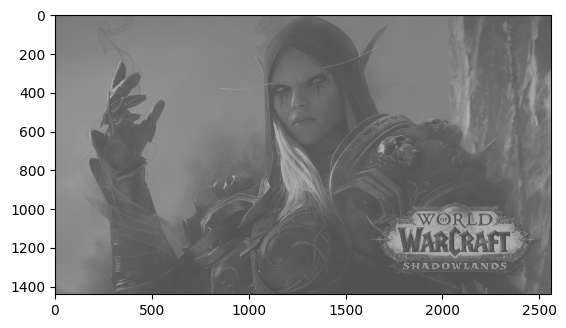

In [85]:
sharp = sharpImage(image)
plt.imshow(sharp,cmap="gray")
plt.show()